In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotclassification

In [2]:
df = pd.read_csv('storedemographicdata.csv')
df.head()

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
0,S0001,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,...,0.002669,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672
1,S0002,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,...,0.002879,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073
2,S0003,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,...,0.000802,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328
3,S0004,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,...,0.001904,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203
4,S0005,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,...,0.001379,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209


In [4]:
result = df.iloc[[85,86, 87,88,89,90,91,92,93,94]]

In [5]:
result.tail()
pred = result.pop('Store')

In [6]:
df1 = pd.read_excel('clustered5.xlsx')
df1.head()

,Store,Address,City,State,Zip,Type,Year,Total Sale,Ptc_Dry_Grocery,Ptc_Dairy,Ptc_Frozen_Food,Ptc_Meat,Ptc_Produce,Ptc_Floral,Ptc_Deli,Ptc_Bakery,Ptc_General_Merchandise,cluster
0,S0001,1000 W El Norte Pkwy,Escondido,CA,92027,Existing,2015,23508945.82,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810,3
1,S0002,12419 Woodside Ave,Lakeside,CA,92040,Existing,2015,17334619.57,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865,3
2,S0003,1342 N Alvarado St,Los Angeles,CA,90026,Existing,2015,30240661.99,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537,2
3,S0004,671 S Rancho Santa Fe Rd,San Marcos,CA,92078,Existing,2015,27913890.97,45.455984,9.711102,8.027714,12.772766,10.040922,0.611963,4.178524,3.446871,5.754154,3
4,S0005,1430 S Fairfax Ave,Los Angeles,CA,90019,Existing,2015,27825886.17,44.016875,10.626809,8.633852,10.186326,13.111205,0.887725,3.538921,2.260686,6.737600,2


In [7]:
Cluster = df1[['Store','cluster']]

In [9]:
Cluster.tail(10)

,Store,cluster
75,S0076,2
76,S0077,2
77,S0078,2
78,S0079,3
79,S0080,1
80,S0081,2
81,S0082,3
82,S0083,2
83,S0084,3
84,S0085,2


In [10]:
All = df.merge(Cluster, on='Store')

In [11]:
All.tail()

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens,cluster
80,S0081,0.119311,0.100858,0.077170,0.058915,0.136299,0.162258,0.202785,0.142389,0.113623,...,0.383996,0.093634,0.060870,0.057686,0.121196,0.140295,0.335326,0.190994,7537.888960,2
81,S0082,0.111088,0.106187,0.084337,0.049214,0.100265,0.125587,0.238309,0.185215,0.203742,...,0.709967,0.259005,0.086621,0.183533,0.134648,0.117496,0.120069,0.098628,960.560197,3
82,S0083,0.121558,0.109939,0.083011,0.065597,0.146077,0.159434,0.194871,0.119515,0.143696,...,0.411022,0.031873,0.027729,0.080478,0.179124,0.212271,0.343904,0.124622,6165.946566,2
83,S0084,0.120931,0.117409,0.093383,0.060457,0.135054,0.155984,0.198778,0.118004,0.107730,...,0.444539,0.022006,0.019841,0.072222,0.205051,0.250722,0.389466,0.040693,6818.896918,3
84,S0085,0.092168,0.081680,0.089120,0.083135,0.146824,0.148815,0.197935,0.160323,0.176607,...,0.580703,0.020141,0.040861,0.115754,0.228267,0.173631,0.237296,0.184049,10557.048145,2


In [12]:
All.drop(['Store'], axis=1,inplace=True)

In [14]:
All.tail()

,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,EdHSGrad,...,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens,cluster
80,0.119311,0.100858,0.077170,0.058915,0.136299,0.162258,0.202785,0.142389,0.113623,0.187888,...,0.383996,0.093634,0.060870,0.057686,0.121196,0.140295,0.335326,0.190994,7537.888960,2
81,0.111088,0.106187,0.084337,0.049214,0.100265,0.125587,0.238309,0.185215,0.203742,0.238527,...,0.709967,0.259005,0.086621,0.183533,0.134648,0.117496,0.120069,0.098628,960.560197,3
82,0.121558,0.109939,0.083011,0.065597,0.146077,0.159434,0.194871,0.119515,0.143696,0.207447,...,0.411022,0.031873,0.027729,0.080478,0.179124,0.212271,0.343904,0.124622,6165.946566,2
83,0.120931,0.117409,0.093383,0.060457,0.135054,0.155984,0.198778,0.118004,0.107730,0.237995,...,0.444539,0.022006,0.019841,0.072222,0.205051,0.250722,0.389466,0.040693,6818.896918,3
84,0.092168,0.081680,0.089120,0.083135,0.146824,0.148815,0.197935,0.160323,0.176607,0.194180,...,0.580703,0.020141,0.040861,0.115754,0.228267,0.173631,0.237296,0.184049,10557.048145,2


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
import statsmodels.api as sm

In [19]:
y = All.pop('cluster')

In [20]:
X_train_sm = sm.add_constant(All)
lr = sm.OLS(y,X_train_sm)
lr_modle = lr.fit()
lr_modle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cluster   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2.444
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00231
Time:                        15:42:03   Log-Likelihood:                -47.837
No. Observations:                  85   AIC:                             181.7
Df Residuals:                      42   BIC:                             286.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3702.0289   1521.438     -2.433      0.019   -6772.415    -631.642
Age0to9          1210.5311   1217.936      0.994      0.326   -1247.364    3668.426
Age10to17        1171.9205   1217.099      0.963      0.341   -1284.286    3628.127
Age18to24        1199.4304   1218.584      0.984      0.331   -1259.771    3658.632
Age25to29        1153.8404   1223.879      0.943      0.351   -1316.048    3623.729
Age30to39        1354.6759   1200.352      1.129      0.265   -1067.733    3777.084
Age40to49        1185.1398   1220.743      0.971      0.337   -1278.418    3648.698
Age50to64        1152.0188   1226.324      0.939      0.353   -1322.803    3626.840
Age65Plus        1174.7495   1225.738      0.958      0.343   -1298.891    3648.390
EdLTHS              6.2222      5.442      1.143      0.259      -4.760      17.205
EdHSGrad           -4.9405      6.116     -0.808      0.424     -17.283       7.402
EdSomeCol        -140.7955     58.307     -2.415      0.020    -258.464     -23.127
EdAssociate         4.3159      7.937      0.544      0.589     -11.702      20.333
EdBachelor          1.9825      5.722      0.346      0.731      -9.566      13.531
EdMaster           -0.1027      8.057     -0.013      0.990     -16.362      16.157
EdProfSchl          5.3683     18.168      0.295      0.769     -31.296      42.033
EdDoctorate        -9.3646     13.916     -0.673      0.505     -37.448      18.718
HHSz1Per         3433.9587   1087.804      3.157      0.003    1238.682    5629.236
HHSz2Per         3438.7454   1087.397      3.162      0.003    1244.290    5633.201
HHSz3Per         3455.3689   1088.891      3.173      0.003    1257.899    5652.839
HHSz4Per         3429.7477   1085.015      3.161      0.003    1240.100    5619.396
HHSz5PlusPer     3450.4295   1088.959      3.169      0.003    1252.821    5648.038
HHIncU25K          77.0331    316.141      0.244      0.809    -560.966     715.032
HHInc25Kto50K      74.4878    316.301      0.235      0.815    -563.833     712.808
HHInc50Kto75K      70.1123    315.272      0.222      0.825    -566.132     706.356
HHInc75Kto100K     76.5404    316.351      0.242      0.810    -561.881     714.962
HHInc100Kto150K    81.2092    318.458      0.255      0.800    -561.464     723.883
HHInc150Kto250K    60.0623    317.919      0.189      0.851    -581.525     701.650
HHInc250KPlus      86.8079    314.504      0.276      0.784    -547.886     721.502
PopAsian         -457.4387    189.943     -2.408      0.020    -840.758     -74.119
PopBlack         -453.8371    190.310     -2.385      0.022    -837.898     -69.776
PopHispanic      -456.9851    189.932     -2.406      0.021    -840.283     -73.688
PopMulti         -475.0804    184.400     -2.576      0.014    -847.215    -102.945
PopNativeAmer    -457.7170    212.806     -2.151      0.037

In [21]:
X_train, X_test, y_train, y_test = train_test_split(All, y, test_size=0.20, random_state=3)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(68, 44) (68,)
(17, 44) (17,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [24]:
X_train.head()

,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,EdHSGrad,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
65,0.134610,0.117273,0.140011,0.075377,0.128329,0.129949,0.162095,0.112327,0.169347,0.186922,...,0.003581,0.449874,0.055958,0.252304,0.315833,0.266952,0.061389,0.037360,0.010204,3386.016881
17,0.135732,0.127954,0.106922,0.068460,0.145867,0.141839,0.162462,0.110820,0.231722,0.261156,...,0.001448,0.186037,0.014135,0.047271,0.075658,0.150967,0.183525,0.336925,0.191519,7755.708779
35,0.152045,0.123207,0.085547,0.062088,0.141237,0.137650,0.178848,0.119378,0.177296,0.238189,...,0.001551,0.621201,0.276707,0.207164,0.210725,0.209468,0.066401,0.026183,0.003351,2842.339247
54,0.157189,0.120303,0.113790,0.083378,0.140244,0.127776,0.142876,0.114482,0.306981,0.224263,...,0.002248,0.370226,0.043713,0.126313,0.243826,0.298751,0.184218,0.096225,0.006954,5478.992236
59,0.160361,0.123852,0.108629,0.082598,0.142917,0.137062,0.154477,0.090104,0.260063,0.224360,...,0.002192,0.383216,0.045962,0.032047,0.212524,0.371706,0.139996,0.145899,0.051866,3908.964517


In [25]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix


In [26]:
RF = RandomForestClassifier(n_estimators= 160, random_state=3,max_depth=5)
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)

In [27]:
score = RF.score(X_test, y_test)
print('Accuracy Score of Random Forest Classifier \n',score)
print('Classification report of Random Forest Classifier\n', classification_report(y_test,predictions))

Accuracy Score of Random Forest Classifier 
 0.8235294117647058
Classification report of Random Forest Classifier
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      0.83      0.83         6
           3       0.83      0.71      0.77         7

    accuracy                           0.82        17
   macro avg       0.82      0.85      0.83        17
weighted avg       0.83      0.82      0.82        17



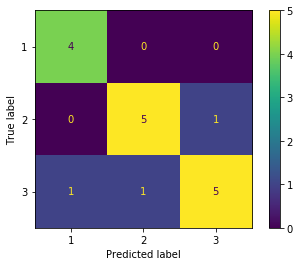

In [28]:
plot_confusion_matrix(RF, X_test, y_test)  
plt.show() 

In [29]:
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(X_train,y_train)
predictions = RF.predict(X_test)

In [30]:
score = DT.score(X_test, y_test)
print('Accuracy Score of Decision Tree Classifier \n',score)
print('Classification report of Decision Tree Classifier \n', classification_report(y_test,predictions))

Accuracy Score of Decision Tree Classifier 
 0.6470588235294118
Classification report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      0.83      0.83         6
           3       0.83      0.71      0.77         7

    accuracy                           0.82        17
   macro avg       0.82      0.85      0.83        17
weighted avg       0.83      0.82      0.82        17



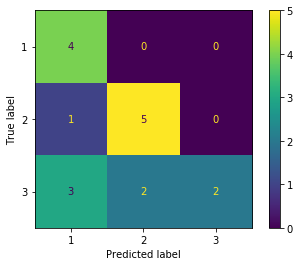

In [31]:
plot_confusion_matrix(DT, X_test, y_test)  
plt.show() 

In [32]:
BT = GradientBoostingClassifier(random_state=3)
BT.fit(X_train,y_train)
predictions = BT.predict(X_test)

In [33]:
score = BT.score(X_test, y_test)
print('Accuracy Score of Gradient Boosting Classifier\n',score)
print('Classification report of Gradient Boosting Classifier\n', classification_report(y_test,predictions))

Accuracy Score of Gradient Boosting Classifier
 0.8823529411764706
Classification report of Gradient Boosting Classifier
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.86      1.00      0.92         6
           3       1.00      0.71      0.83         7

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.90      0.88      0.88        17



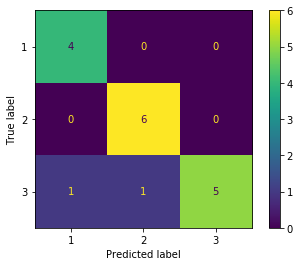

In [34]:
plot_confusion_matrix(BT, X_test, y_test)  
plt.show() 

In [40]:
from yellowbrick.classifier import ClassificationReport

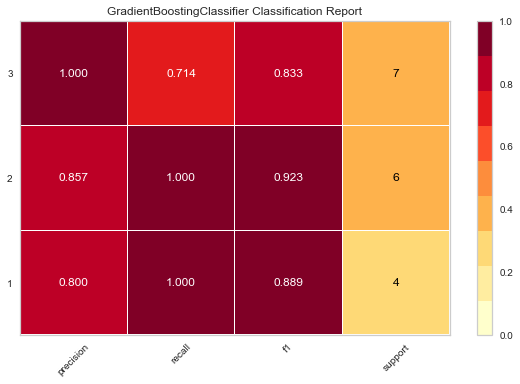

In [51]:
classes = ["cluster1","cluster2","cluster3"]
visualizer = ClassificationReport(BT,  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [46]:
predi = BT.predict(result)

In [47]:
predi

array([3, 2, 3, 2, 2, 1, 2, 1, 2, 2], dtype=int64)